# Example of Map Generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Map generated in 0.055061 seconds


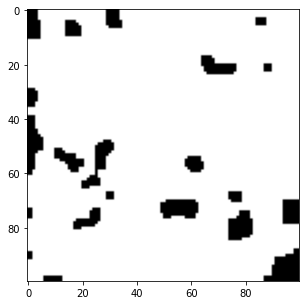

In [23]:
from swarm_mapping.map import Map
import time

np.random.seed(27)
t0 = time.time()
m = Map(100, 100, space_fill=0.8, hazard_fill=0.1, fast=False)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

# World Generation

In [19]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 50, space_fill=0.5, hazard_fill=0.2,fast=True, sensor_range=1)
w.show(size=(15,15))

TypeError: show() missing 1 required positional argument: 'self'

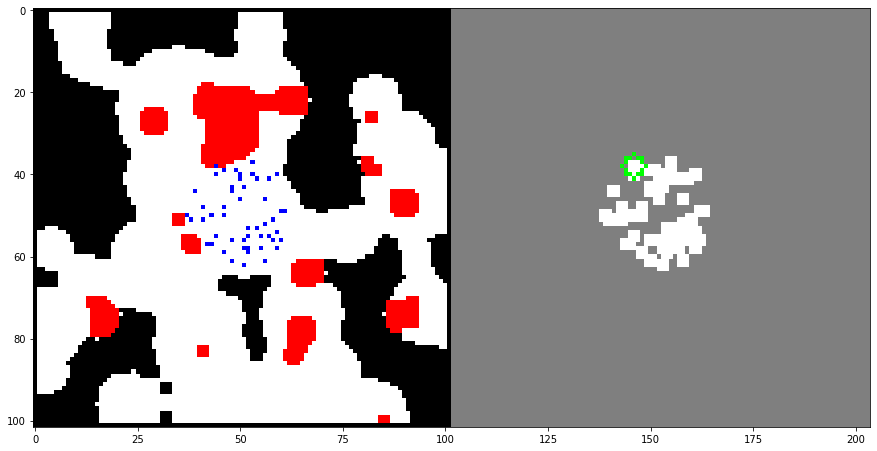

In [15]:
# Iterate a step of the sim, and then show state
w.step()
w.show(size=(15,15))

In [16]:
# Example of proximity sensor output
agent = w.agents[0]
agent.proximity()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

### Run and Animate Simulation

In [17]:
import cv2
import numpy as np

# Display size
display_width = 1600
display_height = 800

step = 0
while True:
    frame = w.render()
    shared_map = w.render(w.agents_map)
    contour_map = w.contour_map
    frame = np.concatenate((frame, shared_map), axis=1)
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

### Print Agent States

In [18]:
for agent in w.agents:
    print(agent)

Agent at (17.52151196366505,70.53554857974375), with velocity (-0.5956734296590451, 0.5410266554419295), alive: False
Agent at (56.25841375716076,34.58868171044904), with velocity (-1.0382565032287818, -0.1963070043597686), alive: True
Agent at (65.60591269649903,74.81182539299806), with velocity (0.2872135954999579, 0.7744271909999159), alive: False
Agent at (57.9683488731641,27.24268184837025), with velocity (0.6240009910263974, -0.8890227718027028), alive: True
Agent at (91.50092708887051,50.06640427874622), with velocity (-1.1698127902685473, -0.10565801560322047), alive: False
Agent at (62.8694013238491,65.79421583855165), with velocity (0.7992075588900063, 0.5295752438574912), alive: False
Agent at (58.65508855402006,35.2514366889085), with velocity (0.9576400257143962, -0.19546261171518964), alive: True
Agent at (86.73645458815544,48.14016712291866), with velocity (1.0347848853504502, -0.19695180057860864), alive: False
Agent at (54.46993910265239,31.367628239363462), with veloc